# Analysis of K3 Tensor Scaling Laws

We analyze how the largest eigenvalue and infinity norm of the K3 tensor scale with respect to:
- Network depth (L)
- Network width (M) 
- Input dimension (D)
- Number of samples (N)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress

In [ ]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("k3_analysis_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Laws Analysis

In [ ]:
def analyze_parameter_scaling(data, param_name):
    other_params = ['N', 'D_IN', 'M', 'L']
    other_params.remove(param_name)
    
    groups = {}
    for d in data:
        key = tuple(d[p] for p in other_params)
        if key not in groups:
            groups[key] = []
        max_eigenvalue = np.max(np.abs(d['mean_eigenvalues']))  # get largest eigenvalue
        groups[key].append((d[param_name], d['inf_norm'], max_eigenvalue))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    for key, values in groups.items():
        x = [v[0] for v in values]
        y = [v[1] for v in values]
        plt.plot(x, y, 'o-', label=str(key))
        
        if len(x) > 1:  # fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            plt.plot(x, np.exp(intercept) * np.array(x)**slope, '--', 
                    label=f'slope={slope:.2f}')
    
    plt.xlabel(param_name)
    plt.ylabel('Infinity Norm')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'K3 Infinity Norm vs {param_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.subplot(122)
    for key, values in groups.items():
        x = [v[0] for v in values]
        y = [v[2] for v in values]
        plt.plot(x, y, 'o-', label=str(key))
        
        if len(x) > 1:  # fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            plt.plot(x, np.exp(intercept) * np.array(x)**slope, '--',
                    label=f'slope={slope:.2f}')
    
    plt.xlabel(param_name)
    plt.ylabel('Largest Eigenvalue')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'K3 Largest Eigenvalue vs {param_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()

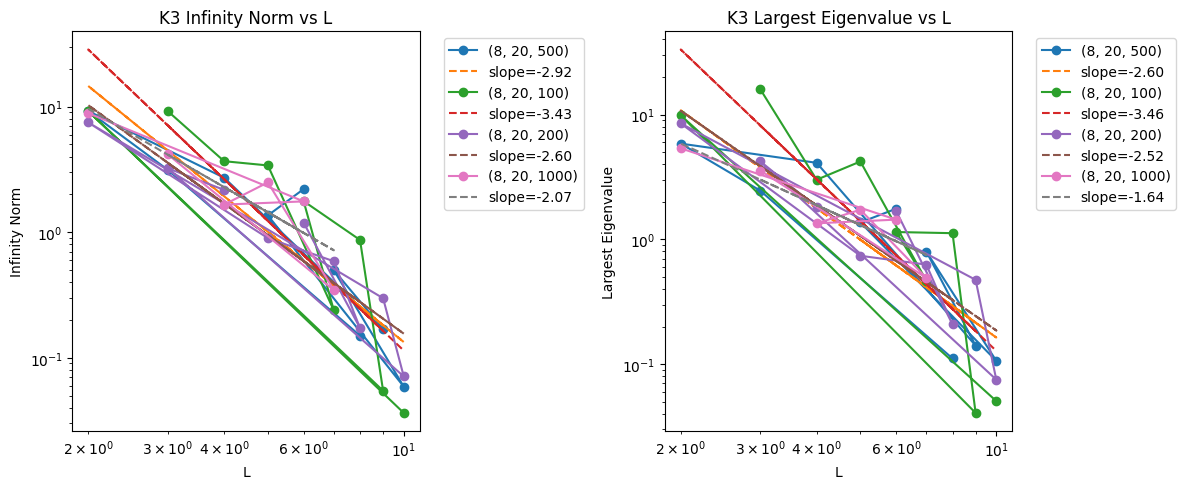

In [ ]:
analyze_parameter_scaling(data, 'L')  # analyze depth scaling

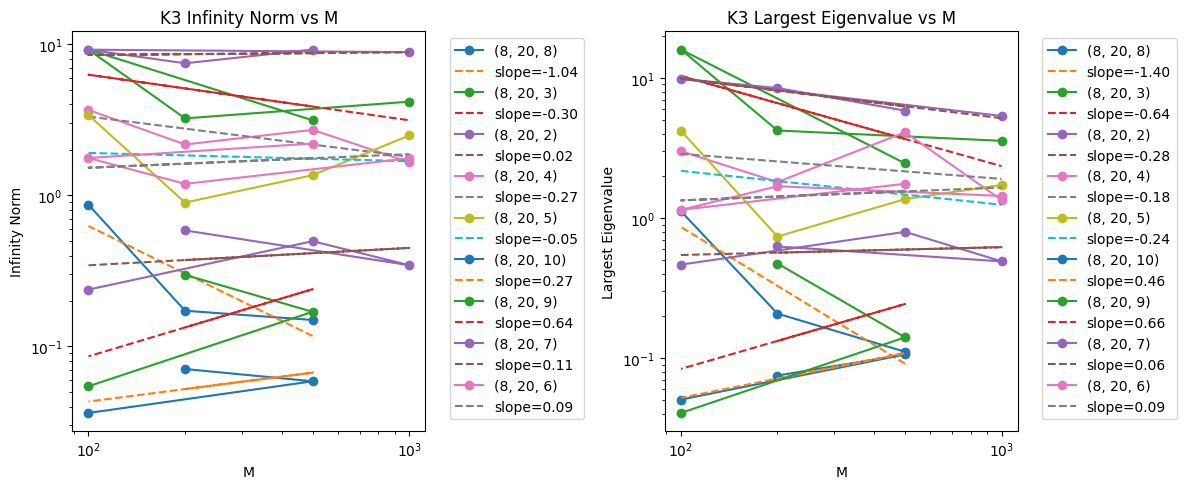

In [ ]:
analyze_parameter_scaling(data, 'M')  # analyze width scaling

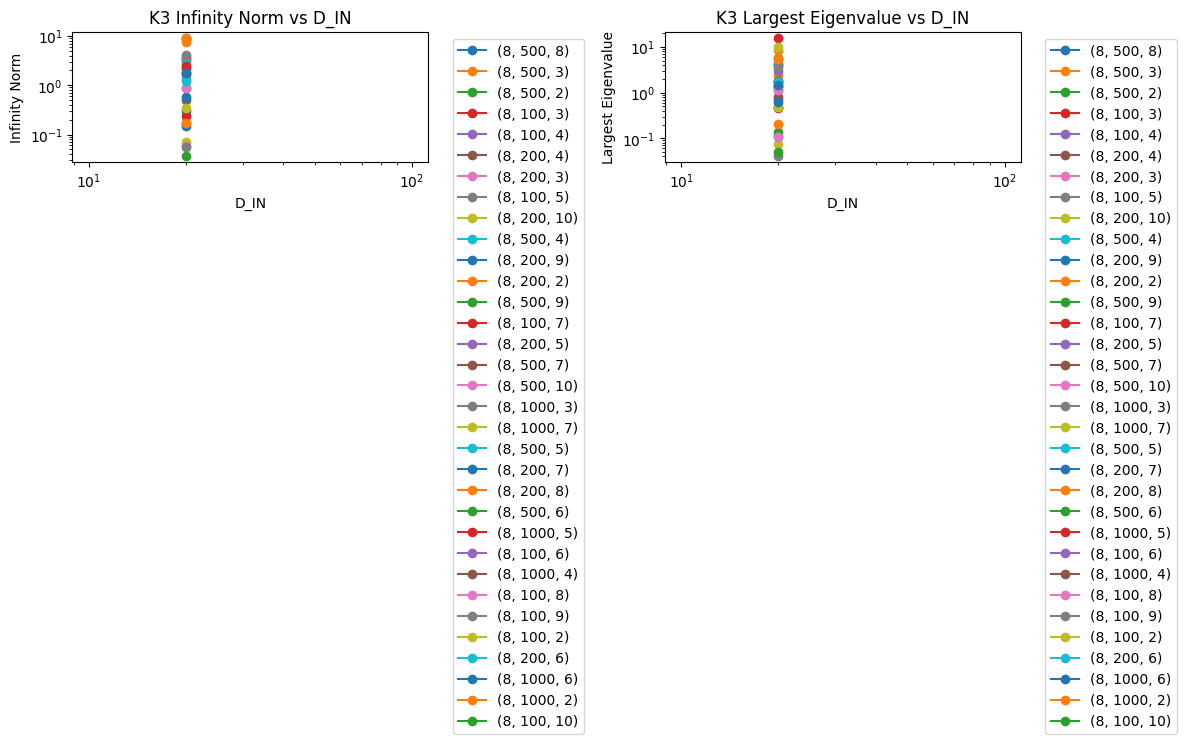

In [ ]:
analyze_parameter_scaling(data, 'D_IN')  # analyze input dimension scaling

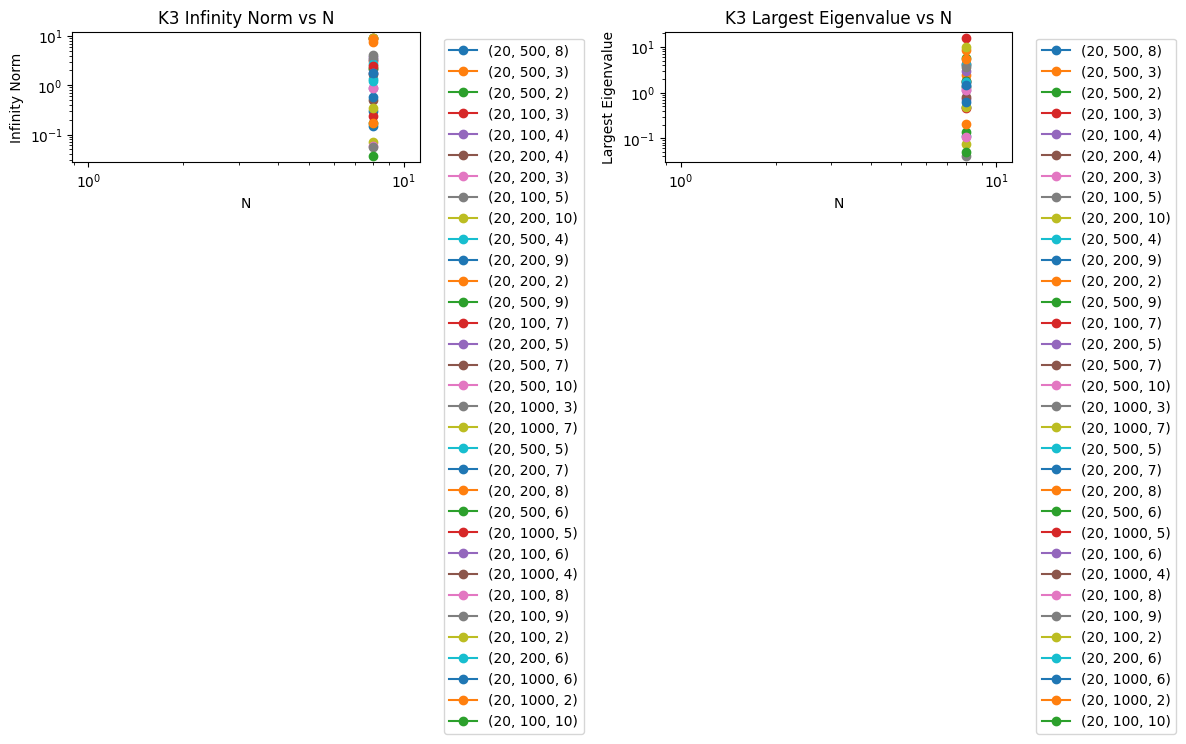

In [ ]:
analyze_parameter_scaling(data, 'N')  # analyze sample size scaling